In [1]:
# Import the libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2
import skimage.io as io

In [2]:
mean_01=np.array([-7.0,6.0])

cov_01=np.array([[2.0,0.0],
                 [0.0,2.0]])

mean_02=np.array([5.0,7.0])

cov_02=np.array([[1.0,0.0],
                 [0.0,1.0]])


mean_03=np.array([0.0,-6.0])

cov_03=np.array([[1.0,0.0],
                 [0.0,1.0]])

data_01=np.random.multivariate_normal(mean_01,cov_01,200)
data_02=np.random.multivariate_normal(mean_02,cov_02,200)
data_03=np.random.multivariate_normal(mean_03,cov_03,200)


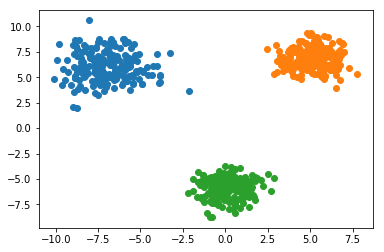

In [3]:
plt.scatter(data_01[:,0],data_01[:,1])
plt.scatter(data_02[:,0],data_02[:,1])
plt.scatter(data_03[:,0],data_03[:,1])

In [4]:
X = np.concatenate((data_01,data_02,data_03),axis=0)
print(X.shape)

(600, 2)


In [5]:
#Create initial clusters , should contain pt , and cluster info
# we use dict with key class_id and values will be another dict

k = 3

colors = ['green' , 'yellow', 'blue']
clusters={}
for kx in range(k):
    center = 10.0*(np.random.random((2,))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color'  : colors[kx]
    }
    clusters[kx]=cluster
print(clusters)


{0: {'points': [], 'color': 'green', 'center': array([-9.77946465, -2.61079022])}, 1: {'points': [], 'color': 'yellow', 'center': array([-0.49947731, -1.75133668])}, 2: {'points': [], 'color': 'blue', 'center': array([-1.32134982, -5.70145057])}}


In [6]:
def distance (v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

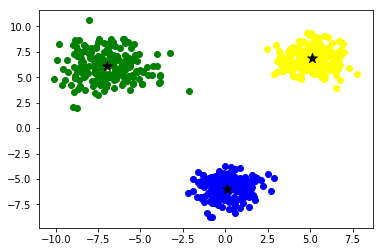

In [12]:
for ix in range(X.shape[0]):
    dist = []
    curr_x = X[ix]
    
    for kx in range(k):
        d=distance(curr_x,clusters[kx]['center'])
        dist.append(d)
    current_cluster_id = np.argmin(dist)
    
    clusters[current_cluster_id]['points'].append(curr_x)
    
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    clusters[kx]['coords']=pts

plt.figure(0)

for kx in range(k):
    pts = clusters[kx]['coords']
    try:
        plt.scatter(pts[:,0],pts[:,1], color=clusters[kx]['color'])
    except:
        pass
    center = clusters[kx]['center']
    plt.scatter(center[0],center[1],color='black',s=100,marker='*')
    
    
for kx in range(k):
    if clusters[kx]['coords'].shape[0] > 0:
        new_center = clusters[kx]['coords'].mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['center'] = new_center
    clusters[kx]['points'] = []